Consignment Pricing Project-----iNeuron Internship. 
HDB resale price predictions.


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

LOADING DATA

In [119]:
data=pd.read_csv("C:/Recent Download/2017-2022.csv")
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [120]:
data.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
120713,2022-02,YISHUN,EXECUTIVE,652,YISHUN AVE 4,04 TO 06,187.0,Apartment,1992,69 years 04 months,1038000.0
120714,2022-02,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,69 years 04 months,888000.0
120715,2022-02,YISHUN,EXECUTIVE,824,YISHUN ST 81,10 TO 12,146.0,Maisonette,1987,64 years 11 months,800000.0
120716,2022-02,YISHUN,MULTI-GENERATION,633,YISHUN ST 61,04 TO 06,171.0,Multi Generation,1987,64 years 11 months,842000.0
120717,2022-02,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,10 TO 12,164.0,Multi Generation,1987,64 years 09 months,845000.0


In [121]:
data.shape

(120718, 11)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120718 entries, 0 to 120717
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                120718 non-null  object 
 1   town                 120718 non-null  object 
 2   flat_type            120718 non-null  object 
 3   block                120718 non-null  object 
 4   street_name          120718 non-null  object 
 5   storey_range         120718 non-null  object 
 6   floor_area_sqm       120718 non-null  float64
 7   flat_model           120718 non-null  object 
 8   lease_commence_date  120718 non-null  int64  
 9   remaining_lease      120718 non-null  object 
 10  resale_price         120718 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 10.1+ MB


DATA CLEANING

In [123]:
#Missing Numbers
data.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

There are no missing values in the dataset.


In [124]:
data['month'] = pd.to_datetime(data['month'])


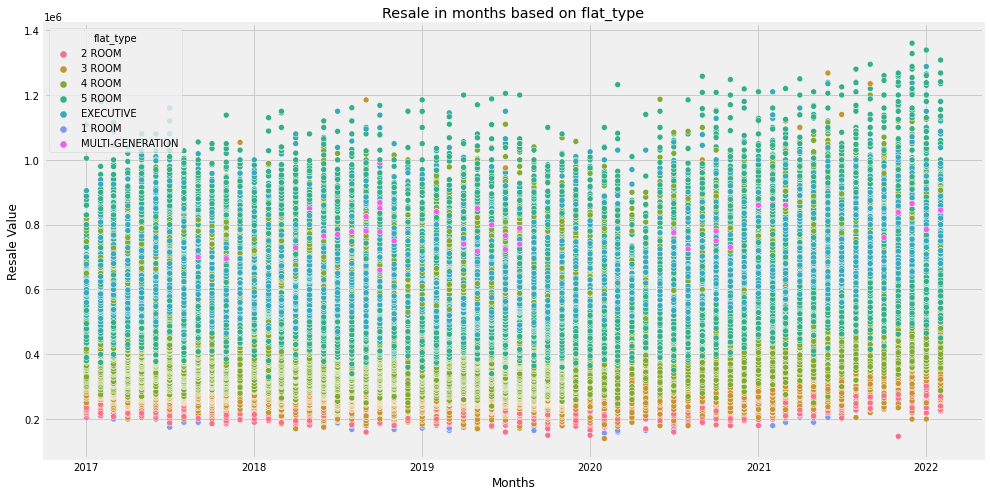

In [125]:
#Data Exploring
#Resale in months based on flat_type
plt.figure(figsize=(15,8))
sns.scatterplot(x='month',y='resale_price',hue='flat_type',data=data)
plt.title('Resale in months based on flat_type')
plt.xlabel('Months')
plt.ylabel('Resale Value')
plt.show()


It is seen that there is a slight rise for 5 rooms in 2022

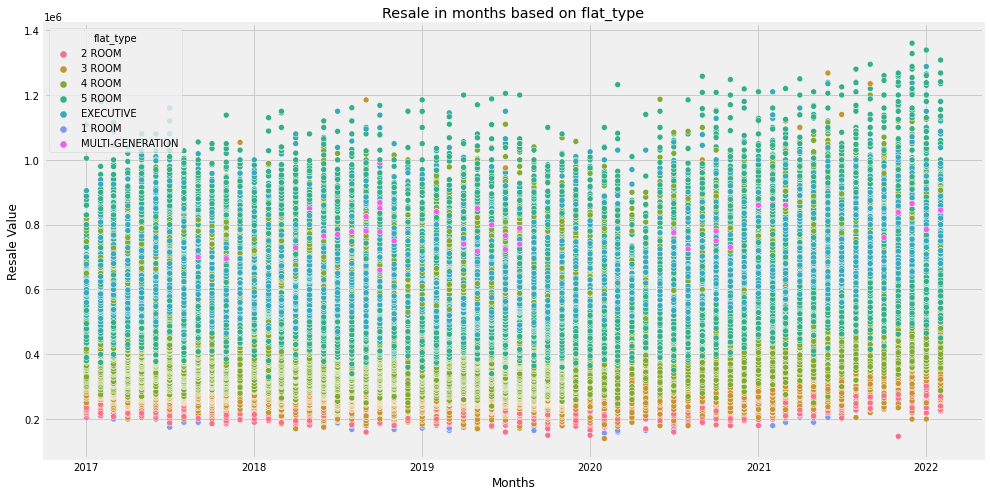

In [126]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='month',y='resale_price',hue='flat_type',data=data)
plt.title('Resale in months based on flat_type')
plt.xlabel('Months')
plt.ylabel('Resale Value')
plt.show()

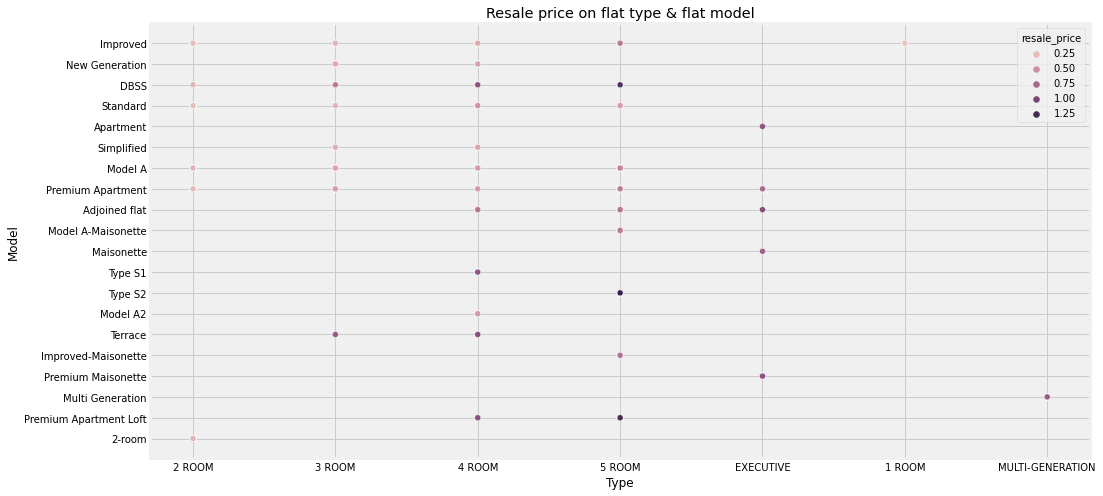

In [127]:
# Resale price on flat type & flat model
plt.figure(figsize=(15,8))
sns.scatterplot(x='flat_type',y='flat_model',hue='resale_price',data=data)
plt.title('Resale price on flat type & flat model')
plt.xlabel('Type')
plt.ylabel('Model')
plt.show()

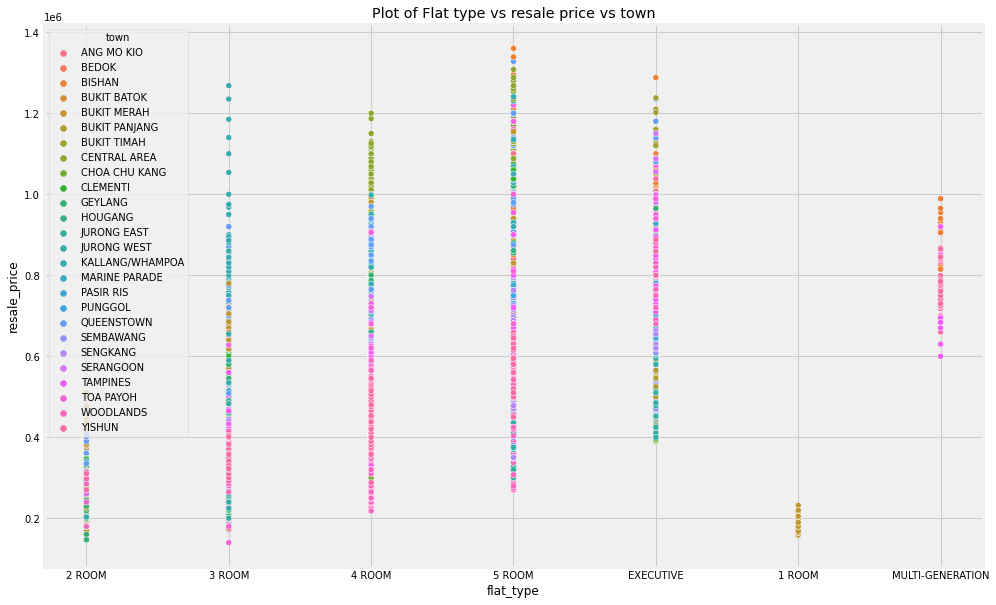

In [128]:
plt.figure(figsize=(15,10))
plt.title('Plot of Flat type vs resale price vs town')
sns.scatterplot(data=data, x='flat_type',y='resale_price', hue='town')
plt.xlabel('flat_type')
plt.ylabel('resale_price')
plt.show()

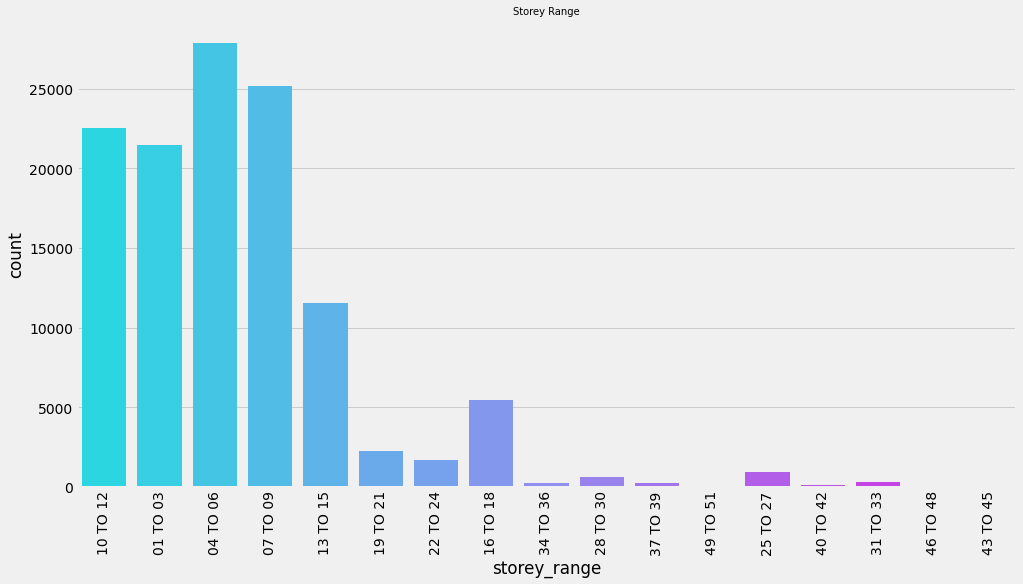

In [129]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['storey_range'], palette = 'cool')
plt.title('Storey Range', fontsize = 10)
plt.xticks(rotation = 90)
plt.show() 

In [130]:
data['street_name'].value_counts()


YISHUN RING RD        1705
PUNGGOL DR            1439
BEDOK RESERVOIR RD    1332
PUNGGOL FIELD         1324
ANG MO KIO AVE 10     1212
                      ... 
SENG POH RD              4
KRETA AYER RD            3
SEMBAWANG WAY            1
ALJUNIED AVE 2           1
ANG MO KIO ST 44         1
Name: street_name, Length: 557, dtype: int64

FEATURE ENGINEERING

In [131]:
len(data['remaining_lease'].unique())

648

In [132]:
len(data['block'].unique())

2569

In [133]:
len(data['street_name'].unique())

557

In [134]:
#Drop Columns
data.drop(['month','street_name','block','remaining_lease'],axis=1,inplace=True)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120718 entries, 0 to 120717
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 120718 non-null  object 
 1   flat_type            120718 non-null  object 
 2   storey_range         120718 non-null  object 
 3   floor_area_sqm       120718 non-null  float64
 4   flat_model           120718 non-null  object 
 5   lease_commence_date  120718 non-null  int64  
 6   resale_price         120718 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.4+ MB


In [136]:
#Encoding Town Feature
data['town'].value_counts()

SENGKANG           10238
PUNGGOL             8820
WOODLANDS           8258
TAMPINES            8204
JURONG WEST         8132
YISHUN              8062
BEDOK               6564
HOUGANG             5929
CHOA CHU KANG       5420
ANG MO KIO          5111
BUKIT PANJANG       4726
BUKIT MERAH         4693
BUKIT BATOK         4020
TOA PAYOH           3877
PASIR RIS           3778
KALLANG/WHAMPOA     3502
QUEENSTOWN          3478
GEYLANG             2970
SEMBAWANG           2815
CLEMENTI            2755
JURONG EAST         2590
BISHAN              2354
SERANGOON           2339
CENTRAL AREA        1009
MARINE PARADE        746
BUKIT TIMAH          328
Name: town, dtype: int64

In [137]:
data['town']=data['town'].replace(('SENGKANG','PUNGGOL','WOODLANDS','TAMPINES','JURONG WEST','YISHUN','BEDOK','HOUGANG','CHOA CHU KANG','ANG MO KIO','BUKIT PANJANG','BUKIT MERAH','BUKIT BATOK','TOA PAYOH','PASIR RIS','KALLANG/WHAMPOA','QUEENSTOWN','GEYLANG','SEMBAWANG','CLEMENTI','JURONG EAST','BISHAN','SERANGOON','CENTRAL AREA','MARINE PARADE','BUKIT TIMAH'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26))

In [138]:
#Encoding for flat_type
data['flat_type'].value_counts()

4 ROOM              50298
5 ROOM              30734
3 ROOM              28190
EXECUTIVE            9595
2 ROOM               1790
MULTI-GENERATION       63
1 ROOM                 48
Name: flat_type, dtype: int64

In [139]:
data['flat_type']=data['flat_type'].replace(('4 ROOM','5 ROOM','3 ROOM','EXECUTIVE','2 ROOM','MULTI-GENERATION','1 ROOM'),(4,5,3,6,2,7,1))

In [140]:
#Encoding for flat_model
data['flat_model'].value_counts()

Model A                   39746
Improved                  30136
New Generation            15574
Premium Apartment         13893
Apartment                  4829
Simplified                 4726
Maisonette                 3632
Standard                   3415
DBSS                       2306
Model A2                   1414
Adjoined flat               222
Model A-Maisonette          218
Type S1                     218
Type S2                     129
Premium Apartment Loft       78
Terrace                      73
Multi Generation             63
Improved-Maisonette          18
2-room                       15
Premium Maisonette           13
Name: flat_model, dtype: int64

In [141]:
data['flat_model']=data['flat_model'].replace(('Model A','Improved','New Generation','Premium Apartment','Apartment','Simplified','Maisonette','Standard','DBSS','Model A2','Adjoined flat','Model A-Maisonette','Type S1','Type S2','Premium Apartment Loft','Terrace','Multi Generation','Improved-Maisonette','2-room','Premium Maisonette'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20))

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120718 entries, 0 to 120717
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 120718 non-null  int64  
 1   flat_type            120718 non-null  int64  
 2   storey_range         120718 non-null  object 
 3   floor_area_sqm       120718 non-null  float64
 4   flat_model           120718 non-null  int64  
 5   lease_commence_date  120718 non-null  int64  
 6   resale_price         120718 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 6.4+ MB


<AxesSubplot:>

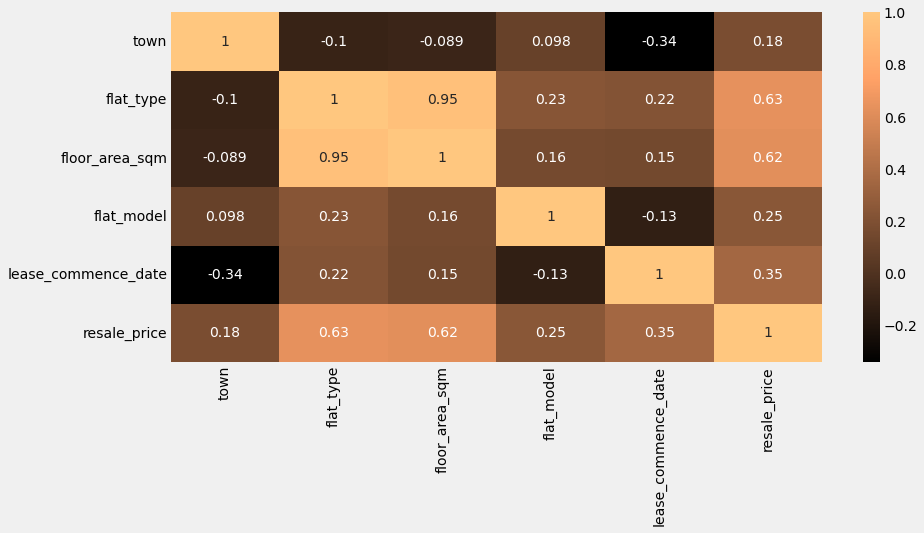

In [143]:
#Correlation
corr=data.corr()
plt.figure(figsize=(13,6))
sns.heatmap(corr,cmap='copper',annot=True)

In [144]:
#Dummy Variable for the left cate
data=pd.get_dummies(data)
data.head()

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_07 TO 09,storey_range_10 TO 12,...,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51
0,10,2,44.0,2,1979,232000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,10,3,67.0,3,1978,250000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,3,67.0,3,1980,262000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,3,68.0,3,1980,265000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,3,67.0,3,1980,265000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


SPLITING SAMPLE DATA

In [145]:
sample_data = data.sample(frac=0.1, random_state=22)
sample_data

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_07 TO 09,storey_range_10 TO 12,...,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_34 TO 36,storey_range_37 TO 39,storey_range_40 TO 42,storey_range_43 TO 45,storey_range_46 TO 48,storey_range_49 TO 51
68995,17,3,60.0,1,2008,560000.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
119981,15,6,147.0,5,1993,670000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
93171,8,6,141.0,5,1998,732888.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80168,3,6,140.0,5,1996,580000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
79142,15,5,125.0,2,1996,495000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94124,23,6,151.0,7,1985,835000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
35109,13,5,126.0,2,1985,470000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
36901,7,3,68.0,3,1982,300000.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
101219,6,4,96.0,1,2012,425000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
x = sample_data.drop('resale_price', axis=1)
y = sample_data['resale_price']

In [147]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=22)

In [148]:
x_train.shape

(8450, 22)

In [149]:
y_train.shape

(8450,)

In [150]:
x_test.shape

(3622, 22)

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_test = scaler.transform(x_test)

SAMPLE MODEL BUILDING

In [152]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from warnings import filterwarnings
filterwarnings('ignore')

In [153]:
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(22)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)

    model_scores = pd.DataFrame(model_scores, index=['Accuracy'])
    model_scores = model_scores.transpose().sort_values('Accuracy')

    return model_scores

BASE LINE MODELS

In [154]:
models = {'Ridge' : Ridge(),
         'Lasso': Lasso(),
         'ElasticNet': ElasticNet(),
         'KNeighborsRegressor': KNeighborsRegressor(),
         'SVR': SVR(),
         'DecisionTreeRegressor': DecisionTreeRegressor(),
         'RandomForestRegressor':RandomForestRegressor(),
         'GradientBoostingRegressor': GradientBoostingRegressor(),
         'AdaBoostRegressor': AdaBoostRegressor()}

In [155]:
baseline_model = fit_and_score(models, x_train, x_test, y_train, y_test)
baseline_model.sort_values('Accuracy')


,Accuracy
SVR,-0.028656
AdaBoostRegressor,0.535408
ElasticNet,0.597409
Lasso,0.653557
Ridge,0.654083
KNeighborsRegressor,0.823528
GradientBoostingRegressor,0.826355
DecisionTreeRegressor,0.853968
RandomForestRegressor,0.902108


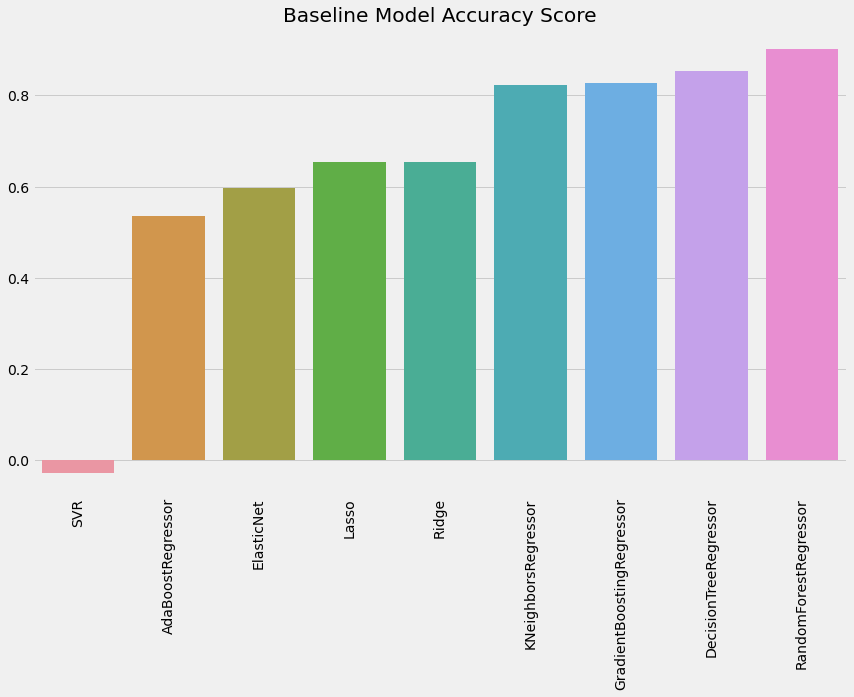

In [156]:
plt.figure(figsize=(13,8))
sns.barplot(data=baseline_model.T)
plt.title('Baseline Model Accuracy Score')
plt.xticks(rotation=90);

 Random Forest Regressor & Decision Tree Regressor gives the best accuracy for the baseline model.

Hyperparameter Tuning 

In [157]:
from sklearn.model_selection import GridSearchCV
def gridsearch_cv_scores(models, params, x_train, x_test, y_train, y_test):
    np.random.seed(22)
    
    gs_model_scores = {}
    gs_best_param = {}
    
    for name, model in models.items():
        gs_model = GridSearchCV(model,
                                param_grid=params[name],
                                cv=5,
                                verbose=0)
        
        gs_model.fit(x_train,y_train)

        gs_model_scores[name] = gs_model.score(x_test,y_test)
        gs_best_param[name] = gs_model.best_params_

    gs_model_scores = pd.DataFrame(gs_model_scores, index=['Accuracy'])
    gs_model_scores = gs_model_scores.transpose().sort_values('Accuracy')
        
    return gs_model_scores, gs_best_param

In [158]:
models = {'RandomForestRegressor':RandomForestRegressor(),
'DecisionTreeRegressor': DecisionTreeRegressor()}

params = {'RandomForestRegressor': {'n_estimators' : [130,150,180,210,240],
                    'criterion' : ['mse'],
                    'oob_score' : [True,False]},
                    'DecisionTreeRegressor': {'criterion': ['mse', 'friedman_mse'],
                                        'ccp_alpha': [0.0,0.1,0.5,0.8]}
          }

In [159]:
gs_model_scores,gs_best_param = gridsearch_cv_scores(models, params, x_train, x_test, y_train, y_test)


In [160]:
gs_model_scores

,Accuracy
DecisionTreeRegressor,0.856733
RandomForestRegressor,0.902654


In [161]:
gs_best_param

{'RandomForestRegressor': {'criterion': 'mse',
  'n_estimators': 180,
  'oob_score': True},
 'DecisionTreeRegressor': {'ccp_alpha': 0.0, 'criterion': 'mse'}}

MODEL BUILDING

In [162]:
x = data.drop('resale_price', axis = 1)
y = data['resale_price']

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_test = scaler.transform(x_test)

In [166]:
model = RandomForestRegressor(criterion='mse',n_estimators=180,oob_score=True)
model.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', n_estimators=180, oob_score=True)

In [167]:
y_pred=model.predict(x_test)

In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [169]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [170]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error: {rmse}')

Mean Absolute Error: 30483.603923142015
Mean Square Error: 1676097356.316843
Root Mean Square Error: 40940.16800547896
